In [1]:
from __future__ import print_function, division
import scipy.interpolate as sci
import numpy as np
from PyAstronomy.pyaC import pyaErrors as PE
import six.moves as smo
from astropy.io import fits
import os
from sklearn import preprocessing
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
from astropy import units as u
from specutils import Spectrum1D
from lmfit import Parameters, minimize, report_fit, Model,fit_report
from pylab import rc
from matplotlib import transforms
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.coordinates import ICRS
from lmfit import Parameters, minimize, report_fit, Model,fit_report
import numpy as np
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import snr_derived
from astropy.io import fits as pyfits
from PyAstronomy import pyasl
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

/home/nwal/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def gaussian(x, amp, cen, wid, off):
    return (amp * np.exp(-(x-cen)**2 / wid))+off
def lorentzian(x, x0, a, gam,off):
    return (a * gam**2 / ( gam**2 + ( x - x0 )**2))+off
def lorentzianGauss(x, x0, a, gam, off, amp,wid,off2):
    return lorentzian(x,x0,a,gam,off)+gaussian(x,amp=amp,cen=x0,wid=wid,off=off2)



59.70625028372536
33.951975475976134
32.70077983105269


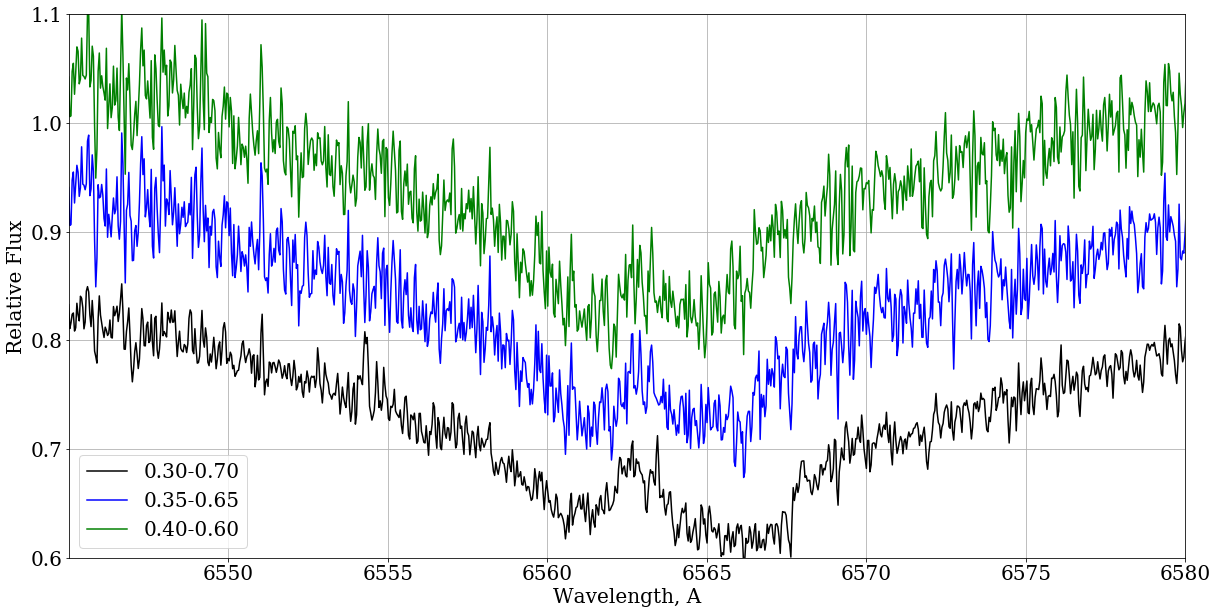

In [30]:
plt.figure(figsize=(20,10))

plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/alphas/030-070CoAdd.fits')
plt.plot(wvl, flx, c='k', label='0.30-0.70')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
plt.xlim(6545.01, 6580)

plt.grid()

wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/alphas/035-065CoAdd.fits')
plt.plot(wvl, flx+0.1, c='b', label='0.35-0.65')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/alphas/040-060coAdd.fits')
plt.plot(wvl, flx+0.2, c='g', label='0.40-0.60')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
plt.ylim(0.6, 1.1)
plt.xlabel('Wavelength, A', fontsize=20)
plt.ylabel('Relative Flux', fontsize=20)
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)

plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
#plt.savefig('HAlpha.pdf')

62.30650213459731
57.30475379668863
51.16111341145837


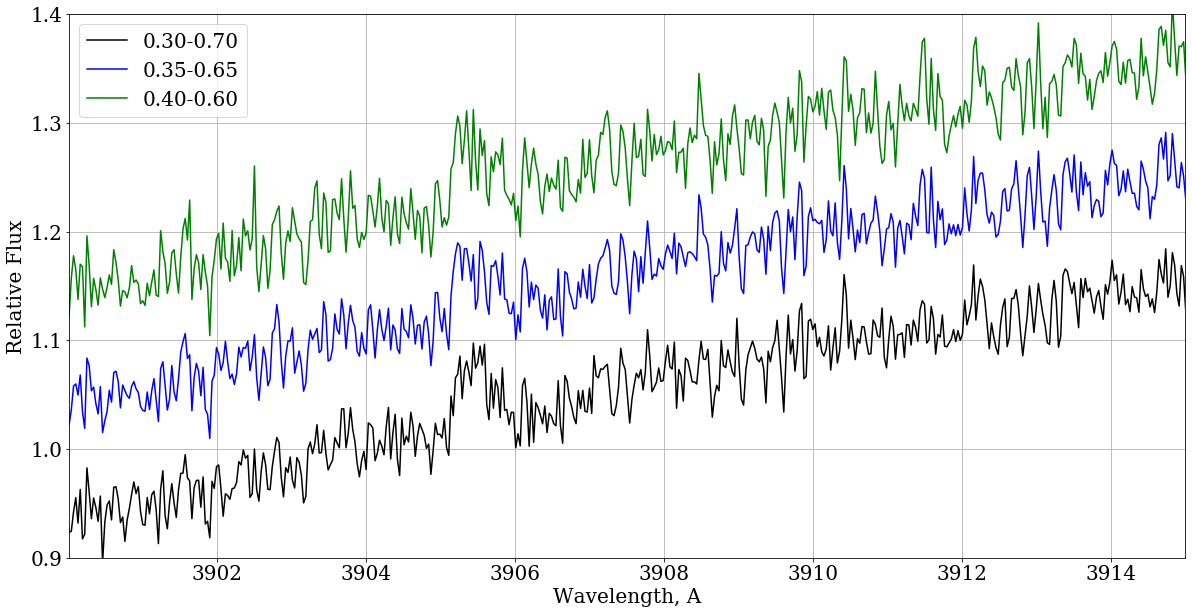

In [31]:
plt.figure(figsize=(20,10))

plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/blue/0.3-0.7.fits')
plt.plot(wvl, flx, c='k', label='0.30-0.70')
plt.xlim(3900.01, 3915)
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
plt.grid()

wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/blue/0.35-0.65.fits')
plt.plot(wvl, flx+0.1, c='b', label='0.35-0.65')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/binaries/WD0137UVES/nighside/blue/0.4-0.6.fits')
plt.plot(wvl, flx+0.2, c='g', label='0.40-0.60')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)
plt.ylim(0.9, 1.4)
plt.xlabel('Wavelength, A', fontsize=20)
plt.ylabel('Relative Flux', fontsize=20)
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)

plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
plt.savefig('CaLine.pdf')